## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(plt.style.available)
plt.style.use('seaborn-pastel')


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = len(combined_df['Mouse ID'].value_counts())
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset= ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

Dup_mice_data =combined_df[combined_df.duplicated(subset= ['Mouse ID','Timepoint'])]
Dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num = len(clean_df['Mouse ID'].value_counts())
clean_mice_num

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = clean_df.groupby('Drug Regimen')
regimen_mean_series = regimen_mean['Tumor Volume (mm3)'].mean()

regimen_median = clean_df.groupby('Drug Regimen')
regimen_median_series = regimen_median['Tumor Volume (mm3)'].median()

regimen_var = clean_df.groupby('Drug Regimen')
regimen_var_series = regimen_var['Tumor Volume (mm3)'].var()

regimen_std = clean_df.groupby('Drug Regimen')
regimen_std_series =regimen_std['Tumor Volume (mm3)'].std()

regimen_sem = clean_df.groupby('Drug Regimen')
regimen_sem_series = regimen_sem['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = {'Mean': regimen_mean_series, 'Median':regimen_median_series, 
                 'Variance':regimen_var_series, 'Standard Deviation': regimen_std_series,
                 'SEM': regimen_sem_series}

summary_df = pd.concat(summary_stats, axis = 1) 
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_grp = clean_df.groupby('Drug Regimen')
summary_stats = regimen_grp['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



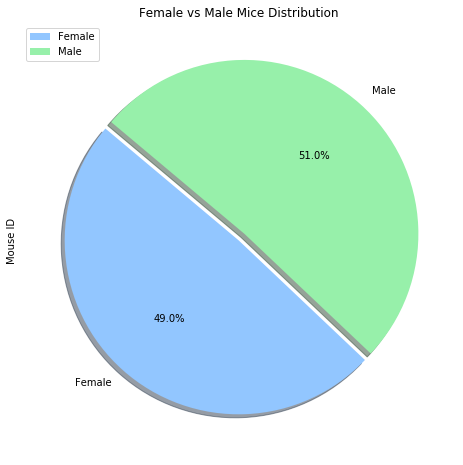

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using panda
gender_df = clean_df.groupby(['Sex']).count().reset_index()

# Filter the DataFrame down only to those columns to chart
gender_mice = gender_df[['Sex','Mouse ID']]

# Set the index to be "Sex" so they will be used as labels
gender_mice = gender_mice.set_index('Sex')

# Use DataFrame.plot() in order to create a pie chart of the data
gender_mice.plot(kind='pie',subplots=True, explode =(0, 0.05), shadow = True, startangle=140,figsize=(12,8), autopct='%1.1f%%')

# Set a title for the chart
plt.title('Female vs Male Mice Distribution')

# Save an image of our chart and print the final product to the screen
plt.savefig("Analysis/PandaPies.png")
plt.show()
plt.tight_layout()



Male      958
Female    922
Name: Sex, dtype: int64


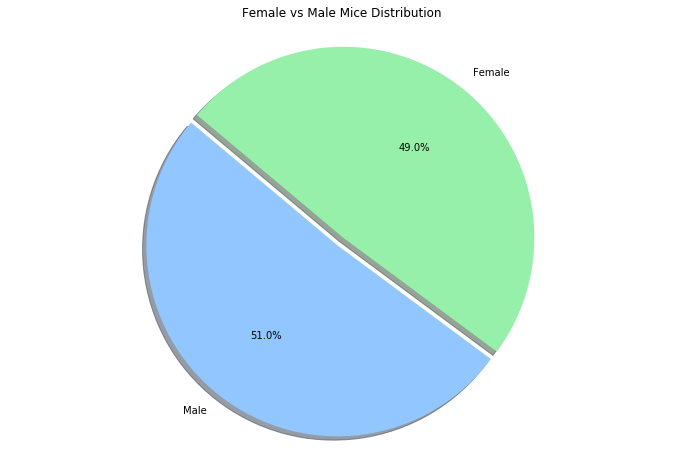

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_df["Sex"].value_counts()
print(mice_sex)

# Create Labels for the sections of the pie
labels = ['Male','Female']
explode = (0, 0.05)

# Tell matplotlib to create a pie chart based upon the above data
# plt.style.use('seaborn-pastel')
plt.figure(figsize=(12,8))
plt.pie(mice_sex, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female vs Male Mice Distribution')
plt.axis('equal')

# Save an image of our chart and print the final product to the screen
plt.savefig("Analysis/PyPies.png")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [18]:
mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
mouse_capomulin

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


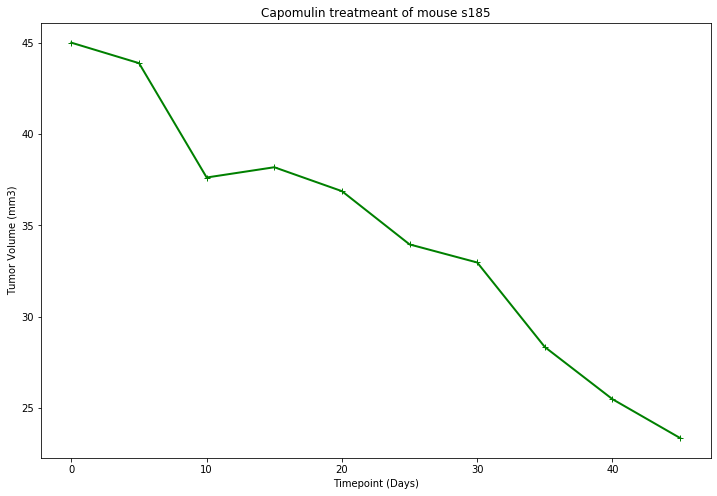

In [25]:
x_timepoint= mouse_capomulin ['Timepoint']
y_tumor = mouse_capomulin ['Tumor Volume (mm3)']



plt.figure(figsize=(12,8))
plt.plot(x_timepoint, y_tumor, marker='+',color= 'green', linewidth=2)
plt.title('Capomulin treatmeant of mouse s185')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# plt.style.use('fivethirtyeight')
plt.savefig('Analysis/campoulin_mouse.png')
plt.show()

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_mouse_weight = capomulin_avg ['Weight (g)']
y_tumor_vol = capomulin_avg ['Tumor Volume (mm3)']

capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_avg
# plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

,index,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,
b128,304.5,9.0,22.0,22.5,41.963636,0.70
b742,294.5,7.0,21.0,22.5,40.083699,0.00
f966,62.0,16.0,17.0,10.0,36.505973,0.00
g288,239.5,3.0,19.0,22.5,41.990097,0.80
g316,355.5,22.0,22.0,22.5,44.613344,1.00
i557,435.5,1.0,24.0,22.5,44.805810,0.20
i738,199.5,23.0,20.0,22.5,39.141053,0.60
j119,332.5,7.0,23.0,22.5,44.465236,0.60
j246,313.5,21.0,21.0,17.5,43.216925,0.25


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
